# **Análise exploratória de dados - dados estatísticos - ANTAQ**

Fazendo conexão com o banco de dados no PostgreSQL:

In [2]:
import psycopg2 as pg
import pandas as pd
import sys


parametros = {"host": "localhost",
             "database": "Antaq",
             "port": 5432,
             "user": "postgres",
             "password": "28549108"}
def conexao_existe(parametros):
    #conectando com o db Antaq - Postgres
    conn = None
    try:
        #tenta conectar
        print('Conectando com o banco no PostgreSQL...')
        conn = pg.connect(**parametros)
    #não conecta exceto se:
    except  (Exception, pg.DatabaseError) as error:
        print (error)
        sys.exit(1)
    print("Conexão realizada com sucesso")
    return conn

In [3]:
def pg_to_pd(conn, select_query, colunas):
    #Transformando a SELECT QUERY em dataframe
    cursor = conn.cursor()
    try: 
        cursor.execute(select_query)
    except (Exception, pg.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    tuplas = cursor.fetchall()
    cursor.close()
    
    df = pd.DataFrame(tuplas, columns=colunas)
    return df

**Conectando e passando os dados para dataframe - Tabela Carga Região**

In [ ]:
conn = conexao_existe(parametros)

nomes_col = ["IDCarga", "Regiao Hidrográfica", "Valor da movimentação"]

df = pg_to_pd(conn, "select * from tbCarga_Regiao", nomes_col)
df

**Conectando e passando dados para dataframe - Tabela Hidrovia**

In [ ]:
conn = conexao_existe(parametros)

nomes_col = ["IDCarga", "Hidrovia", "Valor da movimentação da Hidrovia"]

df = pg_to_pd(conn, "select * from tbCarga_Hidrovia", nomes_col)
df

**Conectando e passando os dados para um dataframe - Tabela Carga Rio**

In [ ]:
conn = conexao_existe(parametros)

nomes_col = ["IDCarga", "Rio", "Valor Movimentação Rio"]

df = pg_to_pd(conn, "select * from tbCarga_Rio", nomes_col)
df

**Conectando e passando para dataframe - Tabela Carga Conteinerizada**

In [ ]:
conn = conexao_existe(parametros)

nomes_col = ["Valor peso carga"]

df = pg_to_pd(conn, "select vl_peso_carga from tbCarga_Conteinerizada", nomes_col)
df.describe()

**Conectando com o banco - Tabela Taxa de ocupação**

In [4]:
conn = conexao_existe(parametros)

nomes_col = ["IDBerco", "dia taxa", "mês taxa", "ano taxa", "Tempo em minutos/dias"]

df_taxa = pg_to_pd(conn, "select * from tbtaxa_ocupação", nomes_col)
df_taxa.describe()

Conectando com o banco no PostgreSQL...
Conexão realizada com sucesso


,dia taxa,ano taxa,Tempo em minutos/dias
count,304775.000000,304775.0,304775.000000
mean,15.720548,2022.0,460.928505
std,8.796261,0.0,619.067568
min,1.000000,2022.0,0.000000
25%,8.000000,2022.0,0.000000
50%,16.000000,2022.0,0.000000
75%,23.000000,2022.0,1241.500000
max,31.000000,2022.0,1440.000000


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['2022Carga_Rio.csv']), delimiter=";", header=0, encoding="UTF-8", engine="python")

Colunas dataframes: 

In [12]:
df.columns.values

array(['IDBerco', 'dia taxa', 'mês taxa', 'ano taxa',
       'Tempo em minutos/dias'], dtype=object)

Filtrando dataframe por colunas: 

In [44]:
coluna_df = ["Valor Movimentação Rio", "Rio"]
carga_mov = df.filter(items=coluna_df)

In [46]:
coluna_df = ["ValorMovimentado"]
carga_mov = df.filter(items=coluna_df)

Removendo coluna - dataframe: 

In [ ]:
df.pop('IDCarga')

Exibindo dataframe: 

In [25]:
df

,IDBerco,dia taxa,mês taxa,ano taxa,Tempo em minutos/dias
0,SUAPIB5,1,jan,2022,1440
1,SSZ0412,1,jan,2022,1440
2,SSZ0663,1,jan,2022,0
3,SSZ0816,1,jan,2022,0
4,BEL0002,1,jan,2022,1440
...,...,...,...,...,...
304770,BRPA2305001,31,dez,2022,0
304771,BRAM1555001,31,dez,2022,0
304772,BRPA2495001,31,dez,2022,375
304773,BRPA2465001,31,dez,2022,0


In [5]:
colunas_taxa = ["dia taxa", "mês taxa", "Tempo em minutos/dias"]
df_taxa_col = df_taxa.filter(items=colunas_taxa)
df_taxa_col

,dia taxa,mês taxa,Tempo em minutos/dias
0,1,jan,1440
1,1,jan,1440
2,1,jan,0
3,1,jan,0
4,1,jan,1440
...,...,...,...
304770,31,dez,0
304771,31,dez,0
304772,31,dez,375
304773,31,dez,0


In [6]:
colunas_taxa_1 = ["dia taxa", "Tempo em minutos/dias"]
df_taxa_col_2 = df_taxa.filter(items=colunas_taxa_1)
df_taxa_col_2

,dia taxa,Tempo em minutos/dias
0,1,1440
1,1,1440
2,1,0
3,1,0
4,1,1440
...,...,...
304770,31,0
304771,31,0
304772,31,375
304773,31,0


In [ ]:
carga_mov.describe()

In [ ]:
#Valor máximo em relação ao valor movimentado da Carga em rios
carga_mov.min()

In [ ]:
#Mediana em relação ao valor movimentado da Carga em rios
carga_mov.median(axis=0, skipna=True, )

In [ ]:
#Média em relação ao valor movimentado da Carga em rios
carga_mov.mean(axis=0, skipna=True)

In [ ]:
#Valor máximo em relação ao valor movimentado da Carga em rios
carga_mov.max()

In [ ]:
#Desvio padrão em relação ao valor movimentado da Carga em rios
df.std(axis=1, ddof=0)

**Medidas de dispersão - Taxa de ocupação**

In [33]:
#Valor máximo em relação ao valor movimentado da Carga em rios
df_taxa_col_2.min()

dia taxa                 1
Tempo em minutos/dias    0
dtype: int64

In [34]:
df_taxa_col_2.mean(axis=0, skipna=True)

dia taxa                  15.720548
Tempo em minutos/dias    460.928505
dtype: float64

In [35]:
df_taxa_col_2.median(axis=0, skipna=True)

dia taxa                 16.0
Tempo em minutos/dias     0.0
dtype: float64

In [36]:
df_taxa_col_2.max()

dia taxa                   31
Tempo em minutos/dias    1440
dtype: int64

In [39]:
df_taxa_col_2.std(ddof=0)

dia taxa                   8.796247
Tempo em minutos/dias    619.066552
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (11,5) )
for rio in df['Rio'].unique():
  plt.hist(df[df['Rio'] == rio]['ValorMovimentado'], bins=10, alpha=0.5, label='valores movimentados')
plt.title('histograma de agrupamento de valores movimentados por rio', fontsize=15)
plt.xlabel('Rio')
plt.ylabel('Valor movimentado')
plt.show()

## Histogramas - Taxa de ocupação em relação aos dias, mês, ano e tempo em minutos dias

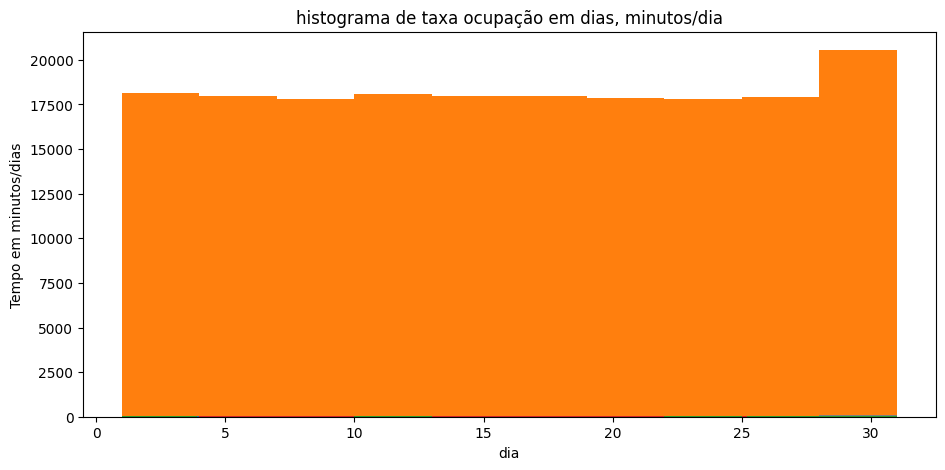

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize= (11,5) )
for tempo in df_taxa_col['Tempo em minutos/dias'].unique():
  plt.hist(df_taxa_col[df['Tempo em minutos/dias'] == tempo]['dia taxa'], bins=10, alpha=1)
plt.title('histograma de taxa ocupação em dias, minutos/dia', fontsize=12)
plt.xlabel('dia')
plt.ylabel('Tempo em minutos/dias')
plt.show()

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize= (11,5) )

n_df = len(df_taxa_col)
index = np.arange(len(df_taxa_col))
y_offset = np.zeros(len(df_taxa_col))
for i in range(n_df):
  #plt.bar(index, df_taxa_col[i], bottom=y_offset, color='orange')
  #y_offset = y_offset + df_taxa_col[i]
plt.title('Gráfico de barras de taxa ocupação em dias, minutos/dia', fontsize=12)
plt.xlabel('dia')
plt.ylabel('Tempo em minutos/dias')
plt.show()

KeyError: 0

<Figure size 1100x500 with 0 Axes>

# **Análise em relação a taxa de ocupação por dias, mês e tempos em minutos/dias**

In [ ]:
#Boxplot - Taxa de Ocupação
df_taxa.plot(kind='box', figsize=(20,10), subplots=True)

In [24]:
'''Medidas de dispersão - valor min, média, desvio padrão, primeiro quartil, 
mediana, terceiro quartil, valor máx. '''
df_taxa_col.describe()

,dia taxa,Tempo em minutos/dias
count,304775.000000,304775.000000
mean,15.720548,460.928505
std,8.796261,619.067568
min,1.000000,0.000000
25%,8.000000,0.000000
50%,16.000000,0.000000
75%,23.000000,1241.500000
max,31.000000,1440.000000


In [21]:
#colunas dataframe - Taxa de ocupção
df_taxa_col.columns.values

array(['dia taxa', 'mês taxa', 'Tempo em minutos/dias'], dtype=object)

dia taxa                    Axes(0.125,0.11;0.352273x0.77)
Tempo em minutos/dias    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

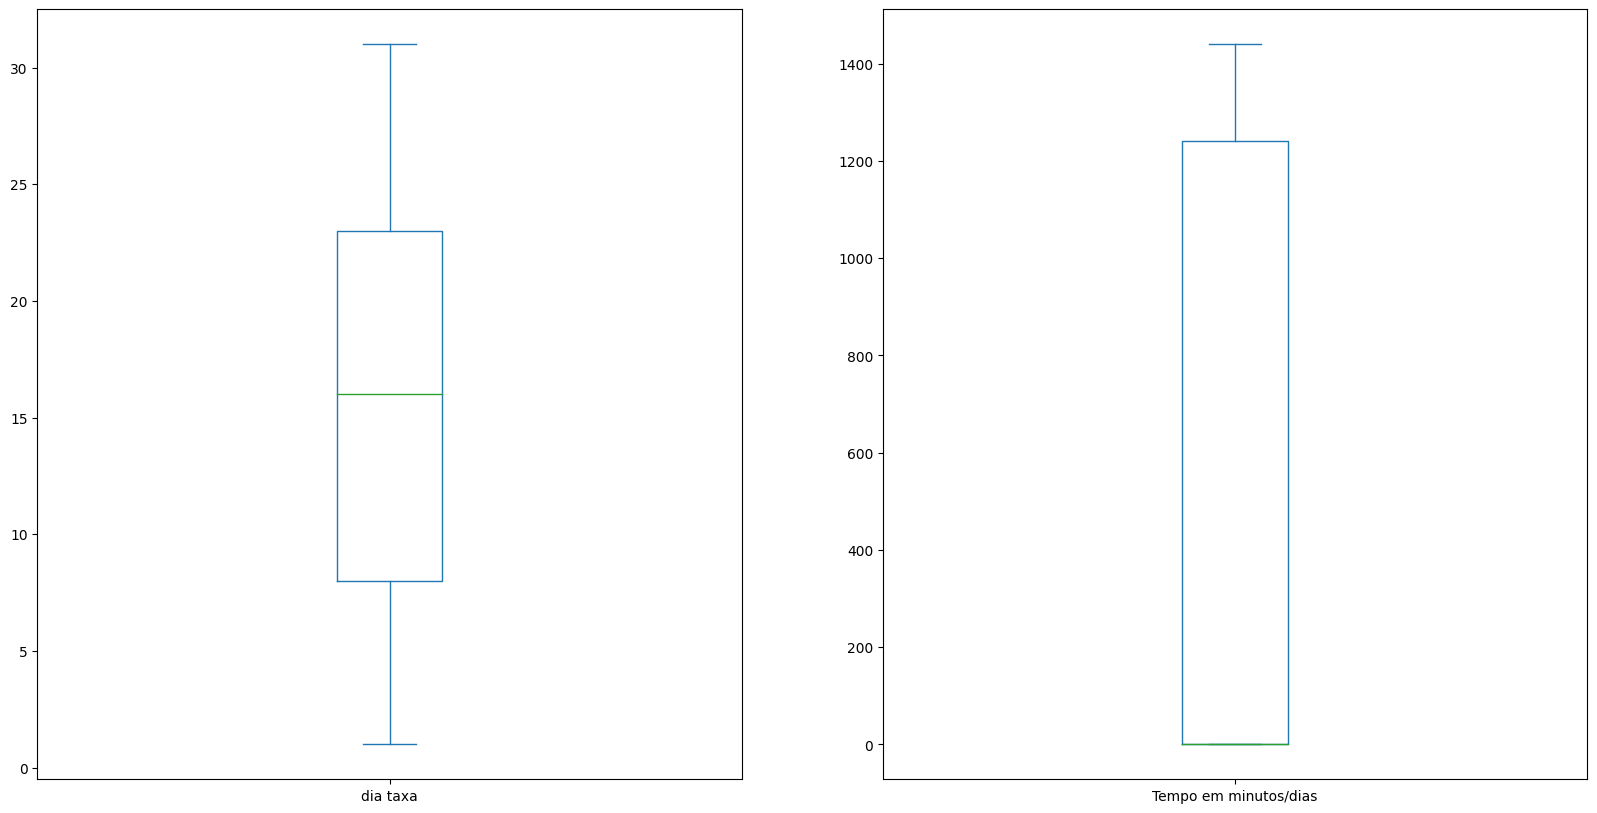

In [22]:
#Boxplot por dia e minutos por dia
df_taxa_col.plot(kind='box', figsize=(20,10), subplots=True)

In [ ]:
df.describe()

In [ ]:
conn.close()

# **Lista de todos os pacotes/bibliotecas utilizadas no projeto**

In [ ]:
%pip list